___
# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided in the local directoriry as it has been cleaned of NA values.


Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
#imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 


## Read in the Data

In [2]:
#with pandas 
loans = pd.read_csv('loan_data.csv')

In [7]:
loans.head()
loans.info()
loans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Exploratory Data Analysis 
Now it's time to visualize the data. 

Text(0.5, 0, 'FICO')

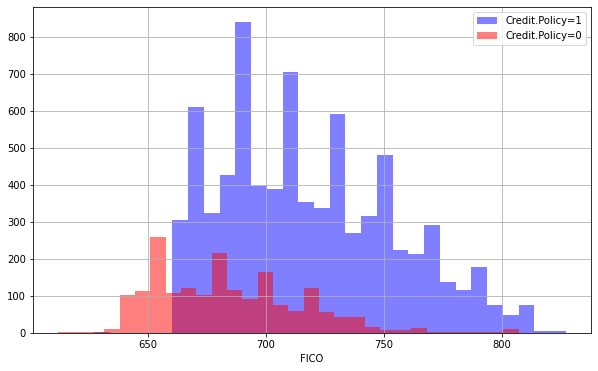

In [9]:
#Create histogram of two FICO distributions representative of
# each credit.policy  outcome.
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(
    alpha=0.5, color='blue',
    bins=30, label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(
    alpha=0.5,color='red',
    bins=30,label='Credit.Policy=0')

plt.legend()
plt.xlabel('FICO')

Let's create a similar visualization for the not.paid.fully column.

Text(0.5, 0, 'FICO')

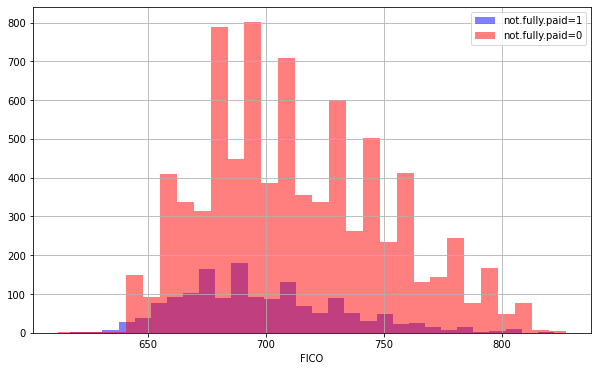

In [10]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(
    alpha=0.5,color='blue',
    bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(
    alpha=0.5,color='red',
    bins=30,label='not.fully.paid=0')

plt.legend()
plt.xlabel('FICO')

Take a closer look.  Create a countplot indicating the counts of loans by purpose; with the color hue defined by not.fully.paid column. 

<AxesSubplot:xlabel='purpose', ylabel='count'>

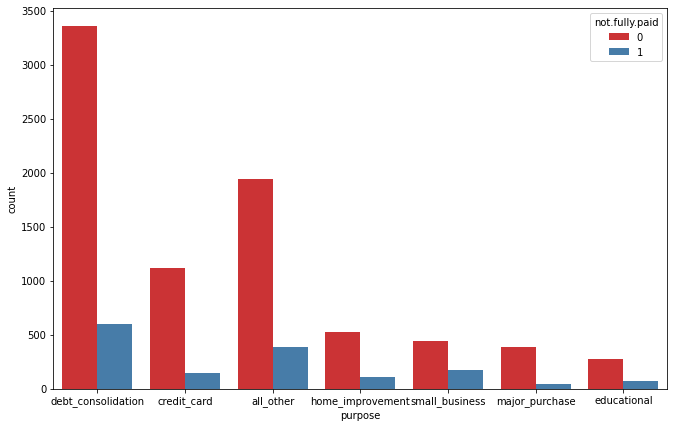

In [11]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',
              data=loans,palette='Set1')

Shift your attention to the trend between FICO score and interest rate.

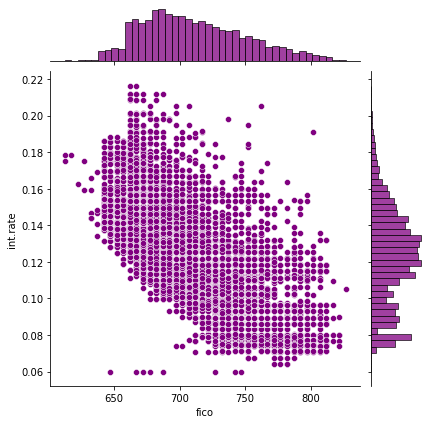

In [12]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

Does this trend differ between not.full.paid and credit.policy? 
Let's find out by creating the following implots.  

<Figure size 792x504 with 0 Axes>

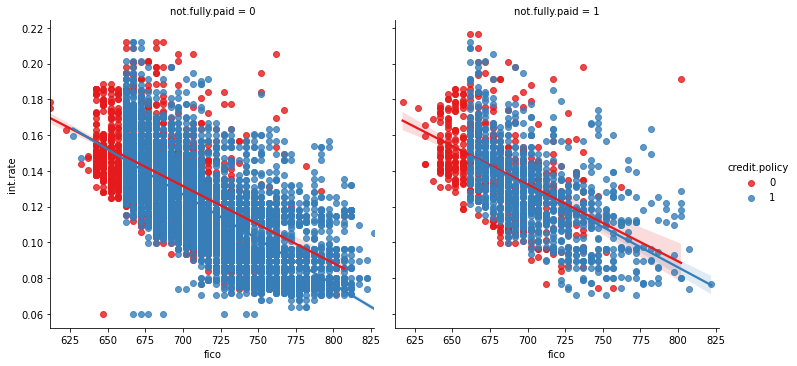

In [13]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

## Prep the Data

In [14]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Notice that the purpose column is categorical. (object) 
In order to successfully run Random Forests classification, we need to transform the categorical purpose column with dummy variables.  **If this step is skipped,** the sklearn library won't understand the categorical data, and the accuracy of Random Forests will depreciate substantially.    

In [17]:
#Create a list of 1 element containing str "purpose"
cat_feats = ['purpose']
#Create DataFrame of dummy data
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)
final_data.info() #View changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Training the Decision Tree Model
Split data into training set and testing set.

In [18]:
#import 
from sklearn.model_selection import train_test_split

In [19]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.30, 
                                        random_state=101)

Let's start by training a single decision tree.

In [23]:
#import 
from sklearn.tree import DecisionTreeClassifier
#Create instance and fit to training data.
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
Create predictions from test set along with a classification report and a confusion matrix.

In [28]:
#import 
from sklearn.metrics import classification_report, confusion_matrix
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))
print("Confusion matrix \n",confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874

Confusion matrix 
 [[1988  443]
 [ 341  102]]


# Training the Random Forest Model

In [30]:
#import 
from sklearn.ensemble import RandomForestClassifier
#instance
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train) #Fit instance to training data

RandomForestClassifier(n_estimators=600)

### Predictions and Evaluation
Utilizing the y_test values, predict the class of not.fully.paid for the X_test data.

In [32]:
predictions = rfc.predict(X_test)

In [34]:
#import 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions)) #Evaluate results
print("Confusion matrix \n",confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.57      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.71      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874

Confusion matrix 
 [[2425    6]
 [ 435    8]]


### So which classifier performed better? 
It depends on what metric you are trying to optimize for.  
Generally Random Forest will always outperform single decision trees.  In this instance, we can observe that both methodoligies of classification evaluate to producing similar results.  In order to optimize accuracy and performance, more feature engineering is required.  

## Thank you for reading!  